## **Question 1**

In [ ]:
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Part 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset1 = pd.read_csv("/content/drive/MyDrive/prml/lab-8/train.csv")
dataset1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
dataset1.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
#Encoding the categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class','satisfaction']
le = LabelEncoder()
for col in cat_cols:
    dataset1[col] = le.fit_transform(dataset1[col])

dataset1.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
dataset1.dropna(axis=0,inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

# Replace '-' with NaN
dataset1 = dataset1.replace('-', np.nan)

# Convert all columns to float
dataset1 = dataset1.astype(float)

# Impute missing values with mean
imputer = SimpleImputer()
df = pd.DataFrame(imputer.fit_transform(dataset1), columns=dataset1.columns)

In [ ]:
#Splitting the dataset into X and Y variables
X_que1 = dataset1.drop('satisfaction', axis=1)
y_que1 = dataset1['satisfaction']

### **Part 2**

In [ ]:
import json
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_que1, y_que1, test_size=0.3, random_state=42)

# Create an object of Decision Tree classifier
dt = DecisionTreeClassifier()
# dt.fit(X_train,y_train)

# Create an object of SFS with Decision Tree classifier object
sfs = SFS(estimator=dt, 
          k_features=10, 
          forward=True, 
          floating=False, 
          scoring='accuracy')

# Train SFS on the dataset
sfs.fit(X_train, y_train)

print('Best Features:')
print(sfs.k_feature_names_)

Best Features:
('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Ease of Online booking', 'Gate location', 'Online boarding', 'Baggage handling', 'Checkin service', 'Inflight service')


In [ ]:
dt_sfs = DecisionTreeClassifier().fit(X_train[list(sfs.k_feature_names_)],y_train)

In [ ]:
print(f"Accuracy on best 10 features selected from sfs is : {dt_sfs.score(X_test[list(sfs.k_feature_names_)],y_test)*100}%")

dt.fit(X_train,y_train)
print(f"Accuracy on using all features is : {dt.score(X_test,y_test)*100}%")

Accuracy on best 10 features selected from sfs is : 94.7392129733904%
Accuracy on using all features is : 94.56546220920879%


### **Part 3**

In [ ]:
toggle_parameters = [(True,False,'SFS'),(False,False,'SBS'),(True,True,'SFFS'),(False,True,'SBFS')]
models = []
for forw,float_,config in toggle_parameters:
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    sfs_obj = SFS(dtree,k_features=10,scoring='accuracy',forward=forw,floating=float_,cv=4)
    sfs_obj.fit(X_train.values,y_train.values)
    models.append(sfs_obj)
    print(f"CV score for configuration {config} is: {sfs_obj.k_score_}")

CV score for configuration SFS is: 0.9483417326423065
CV score for configuration SBS is: 0.9455560963762351
CV score for configuration SFFS is: 0.9486037415025601
CV score for configuration SBFS is: 0.9491277569409522


### **Part 4**

In [ ]:
df= pd.DataFrame([])
for m in models:
    temp_dict = m.get_metric_dict()[10]
    temp_dict['cv_scores'] = list(temp_dict['cv_scores'])
    temp_dict['feature_idx'] = list(temp_dict['feature_idx'])
    temp_dict['feature_names'] = list(temp_dict['feature_names'])
    df=pd.concat([df,pd.json_normalize(temp_dict)],axis=0)
df.index = ['SFS','SBS','SFFS','SBFS']
df


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
SFS,"[2, 4, 5, 7, 9, 10, 12, 17, 18, 19]","[0.9485906558552595, 0.9486458160957582, 0.947...",0.948342,"[2, 4, 5, 7, 9, 10, 12, 17, 18, 19]",0.001238,0.000772,0.000446
SBS,"[2, 4, 5, 7, 10, 13, 14, 17, 18, 19]","[0.9443433173368636, 0.9462739257543162, 0.945...",0.945556,"[2, 4, 5, 7, 10, 13, 14, 17, 18, 19]",0.001167,0.000728,0.000420
SFFS,"[2, 4, 5, 7, 9, 10, 12, 17, 18, 19]","[0.9489216172982514, 0.9488112968172541, 0.947...",0.948604,"[2, 4, 5, 7, 9, 10, 12, 17, 18, 19]",0.000781,0.000487,0.000281
SBFS,"[2, 4, 5, 7, 10, 12, 13, 14, 17, 19]","[0.9488112968172541, 0.9504661040322135, 0.948...",0.949128,"[2, 4, 5, 7, 10, 12, 13, 14, 17, 19]",0.001265,0.000789,0.000455


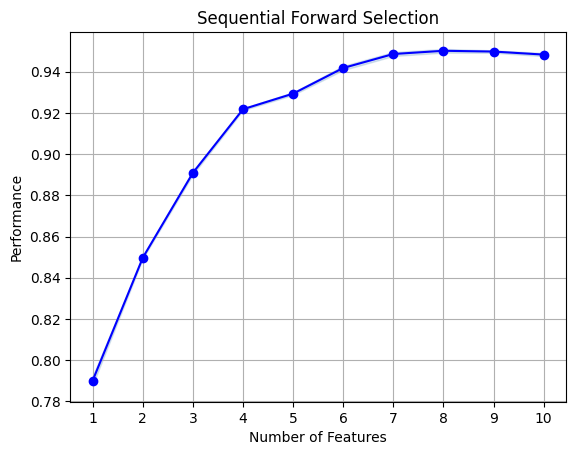

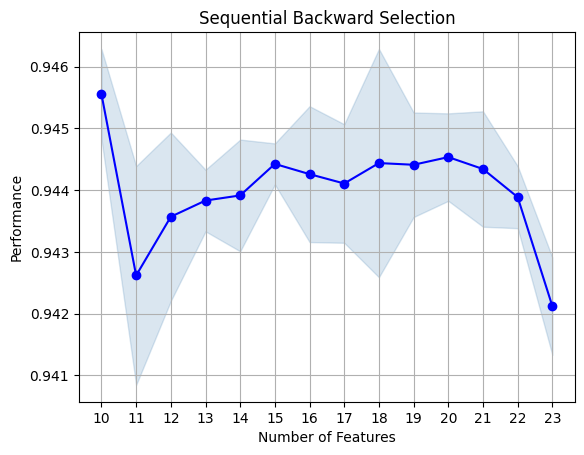

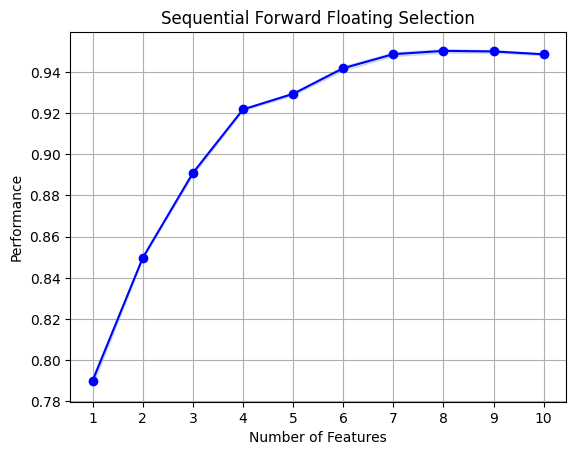

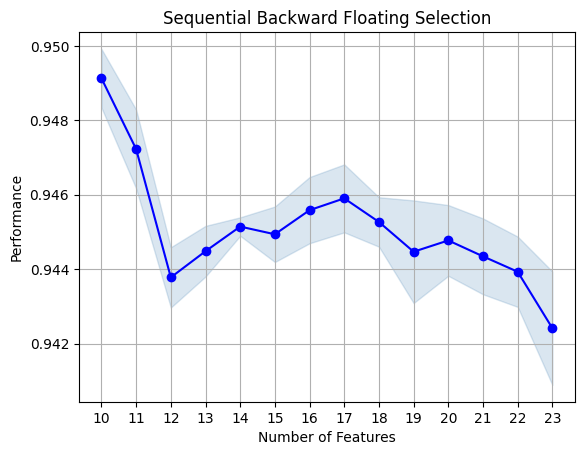

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

config_name = ['Sequential Forward Selection','Sequential Backward Selection','Sequential Forward Floating Selection','Sequential Backward Floating Selection']
i=0
for mod in models:
    fig1 = plot_sfs(mod.get_metric_dict(),kind='std_dev')
    plt.title(config_name[i])
    i+=1
    plt.grid()
    plt.show()


### **Part 5 and Part 6**

In [ ]:
# Define the selection criteria
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from scipy.spatial.distance import cdist


def accuracy_measure_dtc(X_train, y_train, X_test, y_test):
    clf1 = DecisionTreeClassifier()
    clf1.fit(X_train, y_train)
    y_pred1 = clf1.predict(X_test)
    score1 = accuracy_score(y_test, y_pred1)
    return score1

def accuracy_measure_svm(X_train, y_train, X_test, y_test):
    clf = SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

def information_measure(X_train, y_train, X_test, y_test):
    selector = SelectKBest(chi2, k='all')
    selector.fit(X_train, y_train)
    scores = selector.scores_
    # print(scores)
    return scores


In [ ]:
def feature_selection(X_train, y_train, X_test, y_test, selection_criteria):
    # Initialize an empty list to keep track of selected features
    selected_features = []
    
    # Loop over all features in the dataset
    for feature in X_train.columns:
        # Check if the feature has already been selected
        if feature in selected_features:
            continue
        
        # Add the current feature to the list of selected features
        selected_features.append(feature)
        
        # Evaluate the current feature set using the selection criteria
        current_score = selection_criteria(X_train[selected_features], y_train, X_test[selected_features], y_test)
        # print(current_score)
        # Loop over all remaining features in the dataset
        for remaining_feature in X_train.columns:
            # Check if the remaining feature has already been selected
            if remaining_feature in selected_features:
                continue
            
            # Add the remaining feature to the list of selected features
            current_features = selected_features + [remaining_feature]
            
            # Evaluate the current feature set using the selection criteria
            new_score = selection_criteria(X_train[current_features], y_train, X_test[current_features], y_test)
            # print(new_score)
            # If the new score is better than the current score, update the selected features
            if new_score.mean() > current_score.mean():
                current_score = new_score.mean()
                selected_features = current_features
    
    # Return the final list of selected features
    return selected_features


In [ ]:
selected_features_accuracy = feature_selection(X_train, y_train, X_test, y_test, accuracy_measure_dtc)
selected_features_information = feature_selection(X_train, y_train, X_test, y_test, information_measure)

print('Selected features (accuracy measure):', selected_features_accuracy)
print('Selected features (information measure):', selected_features_information)

Selected features (accuracy measure): ['id', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Arrival Delay in Minutes', 'Gender', 'Age', 'Leg room service', 'Flight Distance', 'Departure Delay in Minutes']
Selected features (information measure): ['id', 'Flight Distance', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


### **Part 7**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_acc_dt = RandomForestClassifier()
rf_acc_dt.fit(X_train[selected_features_accuracy], y_train)
cv_acc_dt = cross_val_score(rf_acc_dt, X_train[selected_features_accuracy], y_train, cv=5)
print("Accuracy using Decision Tree and Random Forest:", np.mean(cv_acc_dt))

rf_info_gain = RandomForestClassifier()
rf_info_gain.fit(X_train[selected_features_information], y_train)
cv_info_gain = cross_val_score(rf_info_gain, X_train[selected_features_information], y_train, cv=5)
print("Accuracy using Information Gain and Random Forest:", np.mean(cv_info_gain))


Accuracy using Decision Tree and Random Forest: 0.961938909191202
Accuracy using Information Gain and Random Forest: 0.962297455698821


## **Question 2**

### **Part 1**

In [ ]:
#Generating a dataset of 1000 points from a zero-centred Gaussian distribution with a covariance matrix

import numpy as np
import plotly.graph_objs as go

# Set the mean and covariance matrix
mean = [0, 0, 0]
cov = [[0.6006771,0.14889879,0.244939], [0.14889879,0.58982531,0.24154981], [0.244939,0.24154981,0.48778655]]

# Generate the dataset
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

# Compute the dot product of each data point with the vector v
v = [[1/np.sqrt(6)], [1/np.sqrt(6)], [-2/np.sqrt(6)]]
dot_product = np.dot(dataset2, v)

# Assign labels based on the dot product
labels = np.where(dot_product > 0, 0, 1)

# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(x=dataset2[:,0], y=dataset2[:,1], z=dataset2[:,2], mode='markers', marker=dict(size=4,color=labels))])
fig.show()


### **Part 2**

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA with n_components=3
pca = PCA(n_components=3)
# pca.fit(dataset2)
# transformed_data = pca.transform(dataset2)

transformed_data = pca.fit_transform(dataset2)

# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(x=transformed_data[:,0], y=transformed_data[:,1], z=transformed_data[:,2], mode='markers',marker=dict(size=4,color=labels))])
fig.show()


### **Part 3**

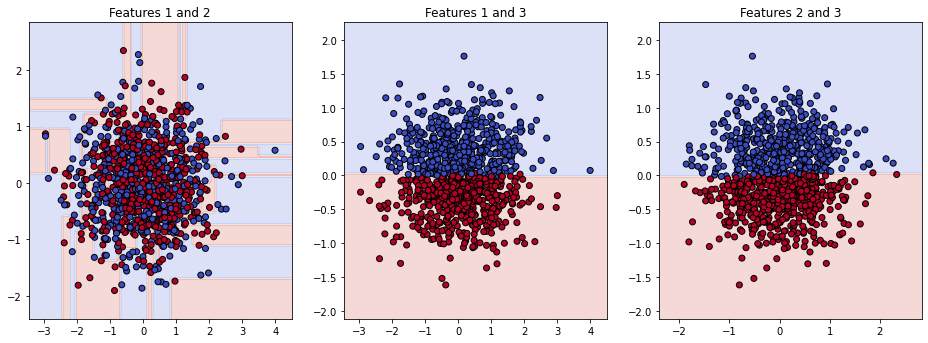

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Perform complete feature selection on the transformed data with a number of features in the subset equal to 2
n_features = 2
combs = []
for i in range(3):
    for j in range(i+1, 3):
        combs.append((i,j))

# accuracies = []

# Fit a decision tree for every subset-set of features of size 2 and plot their decision boundaries superimposed with the data
plt.figure(figsize=(16, 12))
for i, (f1, f2) in enumerate(combs):

    # Select the subset of features
    X = transformed_data[:, [f1, f2]]

    # Fit a decision tree
    clf = DecisionTreeClassifier()
    clf.fit(X, labels)

    # # Calculate the accuracy of the decision tree
    # y_pred = clf.predict(X)
    # acc = accuracy_score(labels, y_pred)
    # accuracies.append(acc)
    # print(f"Features {f1+1} and {f2+1}: Accuracy = {acc:.2f}")

    # Create a meshgrid of points to plot the decision boundary
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
                         np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data
    plt.subplot(2, 3, i+1)
    plt.title(f"Features {f1+1} and {f2+1}")
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', edgecolors='k')
plt.show()


### **Part 4**

PCA Features: Accuracy = 0.4900
Features 1 and 2: Accuracy = 0.4750
Features 1 and 3: Accuracy = 0.9700
Features 2 and 3: Accuracy = 0.9800


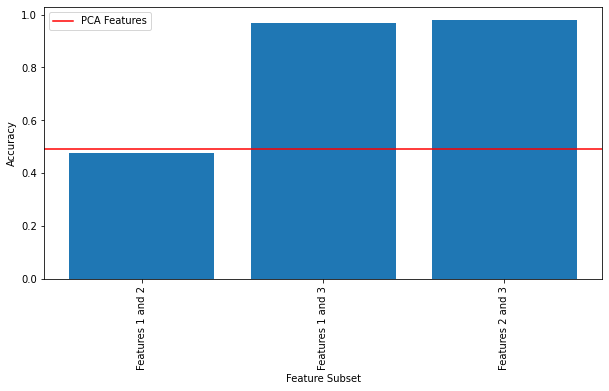

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select the subset of features obtained by applying PCA with n_components=2 and fit a decision tree
X_pca = transformed_data[:, :2]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.2, random_state=42)

clf_pca = DecisionTreeClassifier()
clf_pca.fit(X_train, y_train)

# Calculate the accuracy of the decision tree
y_pred_pca = clf_pca.predict(X_test)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"PCA Features: Accuracy = {acc_pca:.4f}")

# Fit a decision tree for every subset-set of features of size 2 and calculate their accuracies
accuracies = []
for i, (f1, f2) in enumerate(combs):
    # Select the subset of features
    X = transformed_data[:, [f1, f2]]

    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

    # Fit a decision tree
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # Calculate the accuracy of the decision tree
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Features {f1+1} and {f2+1}: Accuracy = {acc:.4f}")

# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.bar(range(len(combs)), accuracies, tick_label=[f"Features {f1+1} and {f2+1}" for f1, f2 in combs])
plt.axhline(y=acc_pca, color='r', linestyle='-', label="PCA Features")
plt.xticks(rotation=90)
plt.xlabel("Feature Subset")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
